<a href="https://colab.research.google.com/github/zen-komiya/simplest-walking/blob/main/simplest_walking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[-1 -5]
 [ 1  1]]


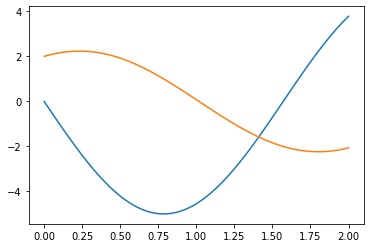

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt

def jac():
    return np.array([[-1, -5], [1, 1]])

def fun(t, y):
    return np.array([-y[0] - 5 * y[1], y[0] + y[1]])

rtol = 1e-3
atol = 1e-6
y0 = [0, 2]
t_span = [0, 2]
J = jac()
print(J)

res = solve_ivp(fun, t_span, y0, rtol=rtol, atol=atol,method='Radau', dense_output=True, jac=J)

t = np.linspace(*t_span,51)
z = res.sol(t)
plt.plot(t,z[0])
plt.plot(t,z[1])

plt.show()

0.00,0.00000000000000000000
0.03,0.00000082334947482110
0.05,-0.00000071323673989099
0.08,0.00000102946029167938
0.10,-0.00000086259272702449
0.12,0.00000128067093951856
0.15,-0.00000104130254596768
0.18,0.00000158597168864461
0.20,-0.00000125478201429274
0.23,0.00000195601522934297
0.25,-0.00000150938636833686
0.28,0.00000240340317381182
0.30,-0.00000181256324971457
0.33,0.00000294301823089427
0.35,-0.00000217302890881399
0.38,0.00000359240858571752
0.40,-0.00000260097082627198
0.43,0.00000437223181304347
0.45,-0.00000310828034955080
0.48,0.00000088633333472643
0.50,0.00000020061317940190


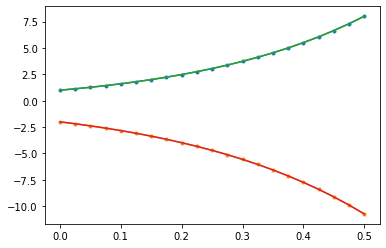

In [ ]:
# https://manabitimes.jp/math/2269
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from math import exp,sin

def fun(t, x):
    return np.array([x[0] - 2.0 * x[1], x[0] + 4.0*x[1]])

def a_x0(t):
    return -2.0*np.exp(2.0*t)+3.0*np.exp(3.0*t)

def a_x1(t):
    return np.exp(2.0*t)-3.0*np.exp(3.0*t)

rtol = 1e-5
atol = 1e-12
x0 = [1, -2]
t_span = [0, 0.5]

res = solve_ivp(fun, t_span, x0, rtol=rtol, atol=atol,method='Radau', dense_output=True)

t = np.linspace(*t_span,21)
z = res.sol(t)
#a_x0(t)

i = 0
for val in t:
    print('{:.2f},{:.20f}'.format(val,z[0,i]-a_x0(val)))
    i+=1

plt.plot(t,z[0],marker=".")
plt.plot(t,z[1],marker=".")
plt.plot(t,a_x0(t))
plt.plot(t,a_x1(t))

plt.show()

0.00,0.00000000000000000000
0.03,0.00000082334947482110
0.05,-0.00000071323673989099
0.08,0.00000102946029167938
0.10,-0.00000086259272702449
0.12,0.00000128067093951856
0.15,-0.00000104130254596768
0.18,0.00000158597168864461
0.20,-0.00000125478201429274
0.23,0.00000195601522934297
0.25,-0.00000150938636833686
0.28,0.00000240340317381182
0.30,-0.00000181256324971457
0.33,0.00000294301823089427
0.35,-0.00000217302890881399
0.38,0.00000359240858571752
0.40,-0.00000260097082627198
0.43,0.00000437223181304347
0.45,-0.00000310828034955080
0.48,0.00000008314970223466
0.50,0.00000019635745118762


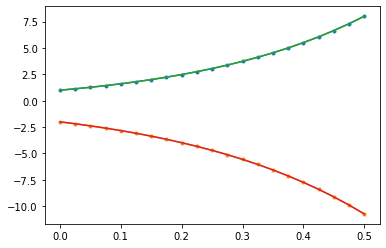

In [ ]:
# https://manabitimes.jp/math/2269
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from math import exp,sin

def fun(t, x):
    return np.array([x[0] - 2.0 * x[1], x[0] + 4.0*x[1]])

def a_x0(t):
    return -2.0*np.exp(2.0*t)+3.0*np.exp(3.0*t)

def a_x1(t):
    return np.exp(2.0*t)-3.0*np.exp(3.0*t)

def jac():
    return np.array([[1, -2], [1, 4]])

rtol = 1e-5
atol = 1e-12
x0 = [1, -2]
t_span = [0, 0.5]

res = solve_ivp(fun, t_span, x0, rtol=rtol, atol=atol,method='Radau', dense_output=True,jac=jac())

t = np.linspace(*t_span,21)
z = res.sol(t)
#print(type(z))
#print(z)
#a_x0(t)

i = 0
for val in t:
    print('{:.2f},{:.20f}'.format(val,z[0,i]-a_x0(val)))
    i+=1

plt.plot(t,z[0],marker=".")
plt.plot(t,z[1],marker=".")
plt.plot(t,a_x0(t))
plt.plot(t,a_x1(t))

plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


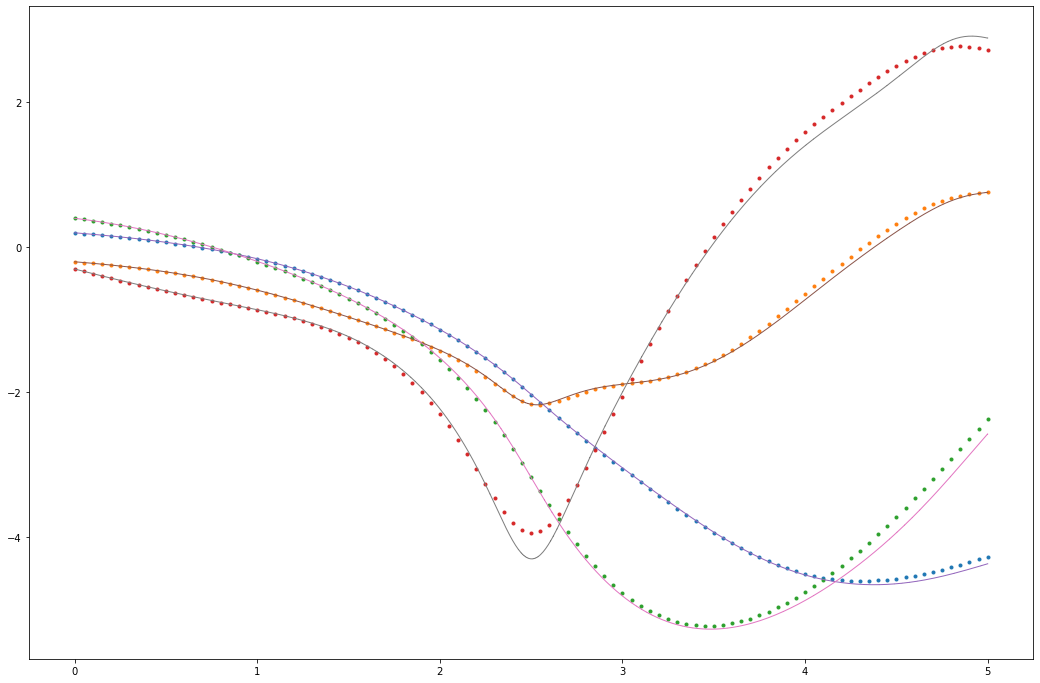

CPU times: user 281 ms, sys: 4.21 ms, total: 285 ms
Wall time: 290 ms


In [ ]:
#
# 小宮倉山2022だけを参照してプログラムを作成する．
# jacobian matrix 「なし」バージョン
#
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from math import exp,sin,cos

import pandas as pd

M = 10.0
m = 3.0
l = 1.0
gamma = 0.5
g = 1.0

def fun(t, x):
# x[0] : theta
# x[1] : thetadot
# x[2] : phi
# x[3] : phidot
    theta = x[0]
    thetadot = x[1]
    phi = x[2]
    phidot = x[3]
    
    thetadotdot = 1.0/(M*l + m*l - m*l*cos(phi)**2) \
             * ( m*l*sin(phi)*(phidot**2-2.0*thetadot*phidot) \
                + M*g*sin(theta-gamma) \
                + m*g*sin(theta-gamma) \
                + m*l*thetadot**2*(1.0-cos(phi))*sin(phi) \
                - m*g*cos(phi)*sin(theta-phi-gamma))
             
    phidotdot = 1.0/(M*l+m*l-m*l*cos(phi)) \
      * (m*l*sin(phi)*(phidot**2-2.0*thetadot*phidot)*(1.0-cos(phi)) \
       + M*g*sin(theta-gamma)*(1.0-cos(phi)) \
       + m*g*sin(theta-gamma)*(1.0-cos(phi)) \
       + m*g*sin(theta-phi-gamma)*(1.0-cos(phi)) \
       + thetadot**2*sin(phi)*(M*l+2.0*m*l*(1.0-cos(phi))) \
       + M*g*sin(theta-phi-gamma))
      
    return np.array([thetadot,thetadotdot,phidot,phidotdot])

def main():

  rtol = 1e-6
  atol = 1e-12
  x0 = [0.2, -0.2,0.4,-0.3]
  t_span = [0, 5.0]

  res = solve_ivp(fun, t_span, x0, rtol=rtol, atol=atol,method='Radau', dense_output=True)

  t = np.linspace(*t_span,101)
  z = res.sol(t)
#print(type(z))
#print(z)
#a_x0(t)

  df = pd.read_csv('/content/drive/MyDrive/kurayama/M_10_m_3_gamma_05.data',sep=' ')
#  print(df)

# このプログラムでの計算結果
  plt.figure(figsize=(18,12))
  plt.plot(t,z[0],marker=".",linestyle="none")
  plt.plot(t,z[1],marker=".",linestyle="none")
  plt.plot(t,z[2],marker=".",linestyle="none")
  plt.plot(t,z[3],marker=".",linestyle="none")

# matlabでの計算結果
  plt.plot(df["t"],df["theta"],linewidth=1.0)
  plt.plot(df["t"],df["thetadot"],linewidth=1.0)
  plt.plot(df["t"],df["phi"],linewidth=1.0)
  plt.plot(df["t"],df["phidot"],linewidth=1.0)

  plt.show()

if __name__ == '__main__':
  %time main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


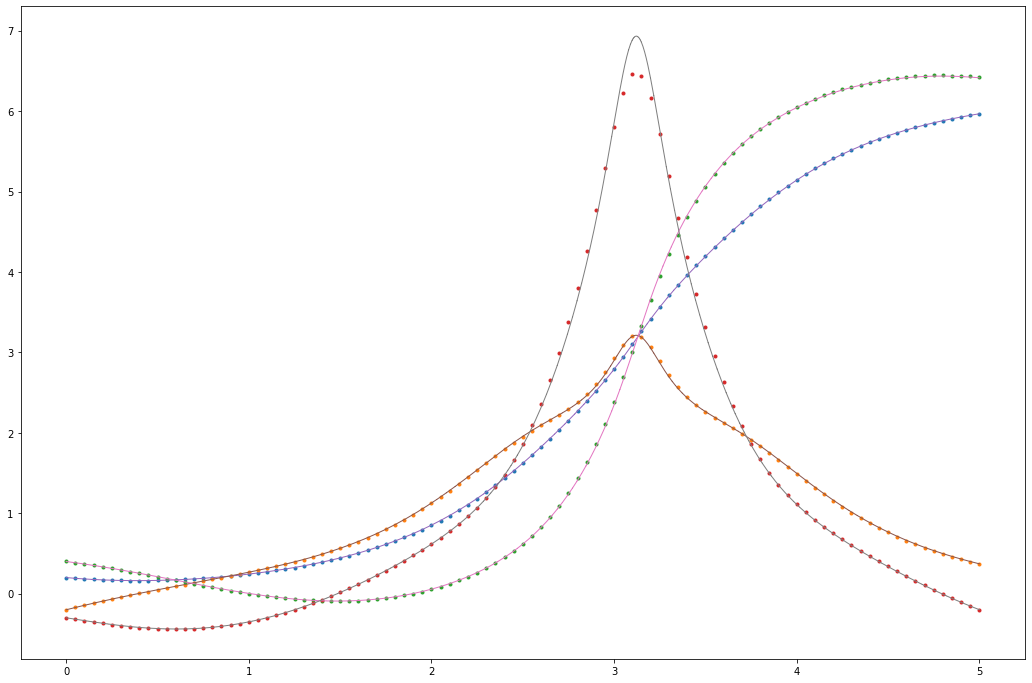

In [ ]:
#
# 小宮倉山2022だけを参照してプログラムを作成する．
# jacobian matrix 「あり」バージョン
#
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from math import exp,sin,cos

import pandas as pd

M = 10.0
m = 3.0
l = 0.5
gamma = 0.01
g = 1.0

def fun(t, x):
# x[0] : theta
# x[1] : thetadot
# x[2] : phi
# x[3] : phidot
    theta = x[0]
    thetadot = x[1]
    phi = x[2]
    phidot = x[3]
    
    thetadotdot = 1.0/(M*l + m*l - m*l*cos(phi)**2) \
             * ( m*l*sin(phi)*(phidot**2-2.0*thetadot*phidot) \
                + M*g*sin(theta-gamma) \
                + m*g*sin(theta-gamma) \
                + m*l*thetadot**2*(1.0-cos(phi))*sin(phi) \
                - m*g*cos(phi)*sin(theta-phi-gamma))
             
    phidotdot = 1.0/(M*l+m*l-m*l*cos(phi)) \
      * (m*l*sin(phi)*(phidot**2-2.0*thetadot*phidot)*(1.0-cos(phi)) \
       + M*g*sin(theta-gamma)*(1.0-cos(phi)) \
       + m*g*sin(theta-gamma)*(1.0-cos(phi)) \
       + m*g*sin(theta-phi-gamma)*(1.0-cos(phi)) \
       + thetadot**2*sin(phi)*(M*l+2.0*m*l*(1.0-cos(phi))) \
       + M*g*sin(theta-phi-gamma))
      
    return np.array([thetadot,thetadotdot,phidot,phidotdot])


def jac(t, x):
# x[0] : theta
# x[1] : thetadot
# x[2] : phi
# x[3] : phidot
    theta = x[0]
    thetadot = x[1]
    phi = x[2]
    phidot = x[3]
      
    J11 = 0.0
    J12 = 1.0
    J13 = 0.0
    J14 = 0.0
    J21 = (M*g*cos(theta-gamma)+m*g*cos(theta-gamma)-m*g*cos(phi)*cos(theta-phi-gamma))/(M*l+m*l-m*l*cos(phi)**2)
    J22 = (-2.0*m*phidot*sin(phi)+2.0*m*thetadot*(1.0-cos(phi))*sin(phi))/(M+m-m*cos(phi)**2)
    J23 = 1.0/(M*l+m*l-m*l*cos(phi)**2)**2 \
    *((m*g*sin(phi)*sin(theta-phi-gamma)+m*g*cos(phi)*cos(theta-phi-gamma))*(M*l+m*l-m*l*cos(phi)**2) \
      - 2.0*m*l*cos(phi)*sin(phi) * \
      (m*l*(phidot**2-2.0*thetadot*phidot)*sin(phi)+M*g*sin(theta-gamma)+m*g*sin(theta-gamma)+m*l*thetadot**2*(1.0-cos(phi))*sin(phi)-m*g*cos(phi)*sin(theta-phi-gamma)))
    J24 = 2.0*m*sin(phi)*(phidot-thetadot)/(M+m-m*cos(phi)**2)
    J31 = 0.0
    J32 = 0.0
    J33 = 0.0
    J34 = 1.0
    J41 = (M*g*(1.0-cos(phi))*cos(theta-gamma)+m*g*(1.0-cos(phi))*(cos(theta-gamma)+cos(theta-phi-gamma))+M*g*cos(theta-phi-gamma))/(M*l+m*l-m*l*cos(phi))
    J42 = (-2.0*m*phidot*(1.0-cos(phi))*sin(phi)+2.0*thetadot*sin(phi)*(M+2.0*m*(1.0-cos(phi))))/(M+m-m*cos(phi))
    J43 = 1.0/(M*l+m*l-m*l*cos(phi))**2 *((M*g*sin(theta-gamma)*sin(phi)+m*g*sin(phi)*sin(theta-gamma)-m*g*cos(theta-phi-gamma)*(1.0-cos(phi)+m*g*sin(phi)*sin(theta-phi-gamma)+thetadot**2*cos(phi)*(M*l+2.0*m*l*(1.0-cos(phi)))+2.0*m*l*thetadot**2*sin(phi)**2-M*g*cos(theta-phi-gamma)))*(M*l+m*l-m*l*cos(phi)) -\
                                          (m*l*sin(phi)*(phidot**2-2.0*thetadot*phidot)+M*g*sin(theta-gamma)*(1.0-cos(phi))+m*g*sin(theta-gamma)*(1.0-cos(phi))+m*g*sin(theta-phi-gamma)*(1.0-cos(phi) + \
                                           thetadot**2*sin(phi)*(M*l+2.0*m*l*(1.0-cos(phi))+M*g*sin(theta-phi-gamma))))*m*l*sin(phi))
    J44 = 2.0*m*sin(phi)*(1.0-cos(phi))*(phidot-thetadot)/(M+m-m*cos(phi))
    return np.array([[J11,J12,J13,J14],[J21,J22,J23,J24],[J31,J32,J33,J34],[J41,J42,J43,J44]])    

def main():

  rtol = 1e-6
  atol = 1e-12
  x0 = [0.2, -0.2,0.4,-0.3]
  t_span = [0, 5.0]

  res = solve_ivp(fun, t_span, x0, rtol=rtol, atol=atol,method='Radau', dense_output=True,jac=jac)

  t = np.linspace(*t_span,101)
  z = res.sol(t)
#print(type(z))
#print(z)
#a_x0(t)

  df = pd.read_csv('/content/drive/MyDrive/kurayama/M_10_m_3_l_05_gamma_001.data',sep=' ')
#  print(df)

# このプログラムでの計算結果
  plt.figure(figsize=(18,12))
  plt.plot(t,z[0],marker=".",linestyle="none")
  plt.plot(t,z[1],marker=".",linestyle="none")
  plt.plot(t,z[2],marker=".",linestyle="none")
  plt.plot(t,z[3],marker=".",linestyle="none")

# matlabでの計算結果
  plt.plot(df["t"],df["theta"],linewidth=1.0)
  plt.plot(df["t"],df["thetadot"],linewidth=1.0)
  plt.plot(df["t"],df["phi"],linewidth=1.0)
  plt.plot(df["t"],df["phidot"],linewidth=1.0)

  plt.show()

if __name__ == '__main__':
    main()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CPU times: user 63.4 ms, sys: 0 ns, total: 63.4 ms
Wall time: 63.7 ms
CPU times: user 59.2 ms, sys: 0 ns, total: 59.2 ms
Wall time: 59 ms


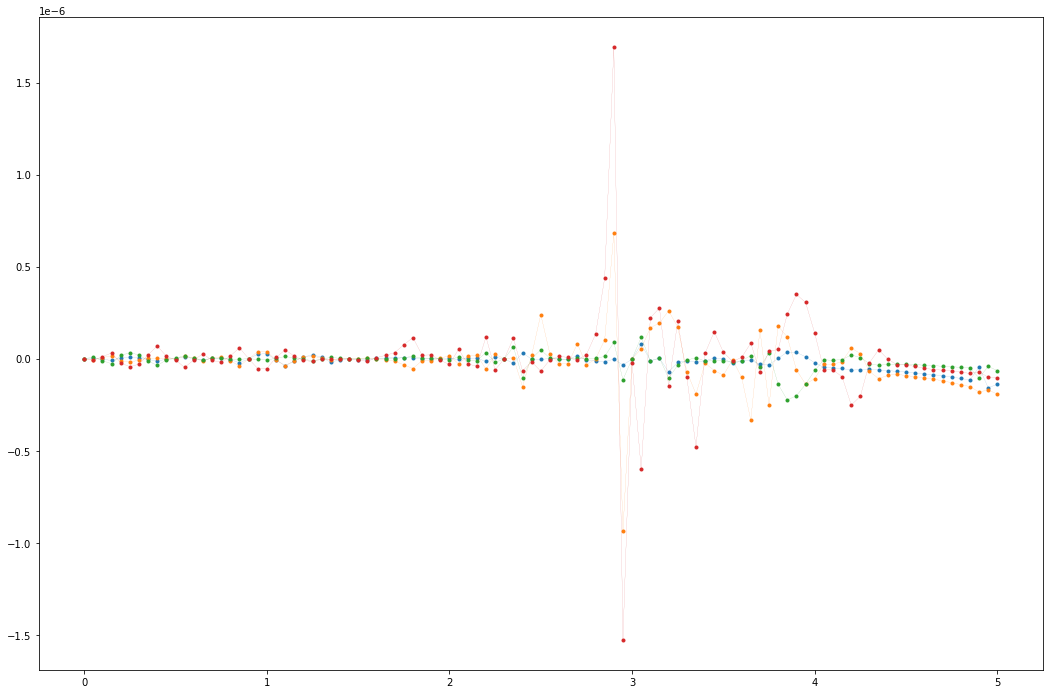

In [ ]:
#
# 小宮倉山2022だけを参照してプログラムを作成する．
# jacobian matrix 「あり」と「なし」の比較

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from math import exp,sin,cos

import pandas as pd

M = 10.0
m = 3.0
l = 0.5
gamma = 0.01
g = 1.0

def fun(t, x):
# x[0] : theta
# x[1] : thetadot
# x[2] : phi
# x[3] : phidot
    theta = x[0]
    thetadot = x[1]
    phi = x[2]
    phidot = x[3]
    
    thetadotdot = 1.0/(M*l + m*l - m*l*cos(phi)**2) \
             * ( m*l*sin(phi)*(phidot**2-2.0*thetadot*phidot) \
                + M*g*sin(theta-gamma) \
                + m*g*sin(theta-gamma) \
                + m*l*thetadot**2*(1.0-cos(phi))*sin(phi) \
                - m*g*cos(phi)*sin(theta-phi-gamma))
             
    phidotdot = 1.0/(M*l+m*l-m*l*cos(phi)) \
      * (m*l*sin(phi)*(phidot**2-2.0*thetadot*phidot)*(1.0-cos(phi)) \
       + M*g*sin(theta-gamma)*(1.0-cos(phi)) \
       + m*g*sin(theta-gamma)*(1.0-cos(phi)) \
       + m*g*sin(theta-phi-gamma)*(1.0-cos(phi)) \
       + thetadot**2*sin(phi)*(M*l+2.0*m*l*(1.0-cos(phi))) \
       + M*g*sin(theta-phi-gamma))
      
    return np.array([thetadot,thetadotdot,phidot,phidotdot])


def jac(t, x):
# x[0] : theta
# x[1] : thetadot
# x[2] : phi
# x[3] : phidot
    theta = x[0]
    thetadot = x[1]
    phi = x[2]
    phidot = x[3]
      
    J11 = 0.0
    J12 = 1.0
    J13 = 0.0
    J14 = 0.0
    J21 = (M*g*cos(theta-gamma)+m*g*cos(theta-gamma)-m*g*cos(phi)*cos(theta-phi-gamma))/(M*l+m*l-m*l*cos(phi)**2)
    J22 = (-2.0*m*phidot*sin(phi)+2.0*m*thetadot*(1.0-cos(phi))*sin(phi))/(M+m-m*cos(phi)**2)
    J23 = 1.0/(M*l+m*l-m*l*cos(phi)**2)**2 \
    *((m*g*sin(phi)*sin(theta-phi-gamma)+m*g*cos(phi)*cos(theta-phi-gamma))*(M*l+m*l-m*l*cos(phi)**2) \
      - 2.0*m*l*cos(phi)*sin(phi) * \
      (m*l*(phidot**2-2.0*thetadot*phidot)*sin(phi)+M*g*sin(theta-gamma)+m*g*sin(theta-gamma)+m*l*thetadot**2*(1.0-cos(phi))*sin(phi)-m*g*cos(phi)*sin(theta-phi-gamma)))
    J24 = 2.0*m*sin(phi)*(phidot-thetadot)/(M+m-m*cos(phi)**2)
    J31 = 0.0
    J32 = 0.0
    J33 = 0.0
    J34 = 1.0
    J41 = (M*g*(1.0-cos(phi))*cos(theta-gamma)+m*g*(1.0-cos(phi))*(cos(theta-gamma)+cos(theta-phi-gamma))+M*g*cos(theta-phi-gamma))/(M*l+m*l-m*l*cos(phi))
    J42 = (-2.0*m*phidot*(1.0-cos(phi))*sin(phi)+2.0*thetadot*sin(phi)*(M+2.0*m*(1.0-cos(phi))))/(M+m-m*cos(phi))
    J43 = 1.0/(M*l+m*l-m*l*cos(phi))**2 *((M*g*sin(theta-gamma)*sin(phi)+m*g*sin(phi)*sin(theta-gamma)-m*g*cos(theta-phi-gamma)*(1.0-cos(phi)+m*g*sin(phi)*sin(theta-phi-gamma)+thetadot**2*cos(phi)*(M*l+2.0*m*l*(1.0-cos(phi)))+2.0*m*l*thetadot**2*sin(phi)**2-M*g*cos(theta-phi-gamma)))*(M*l+m*l-m*l*cos(phi)) -\
                                          (m*l*sin(phi)*(phidot**2-2.0*thetadot*phidot)+M*g*sin(theta-gamma)*(1.0-cos(phi))+m*g*sin(theta-gamma)*(1.0-cos(phi))+m*g*sin(theta-phi-gamma)*(1.0-cos(phi) + \
                                           thetadot**2*sin(phi)*(M*l+2.0*m*l*(1.0-cos(phi))+M*g*sin(theta-phi-gamma))))*m*l*sin(phi))
    J44 = 2.0*m*sin(phi)*(1.0-cos(phi))*(phidot-thetadot)/(M+m-m*cos(phi))
    return np.array([[J11,J12,J13,J14],[J21,J22,J23,J24],[J31,J32,J33,J34],[J41,J42,J43,J44]])    

def main():

  rtol = 1e-6
  atol = 1e-12
  x0 = [0.2, -0.2,0.4,-0.3]
  t_span = [0.0, 5.0]

  %time solve_ivp(fun, t_span, x0, rtol=rtol, atol=atol,method='Radau', dense_output=True,jac=jac)
  ari = solve_ivp(fun, t_span, x0, rtol=rtol, atol=atol,method='Radau', dense_output=True,jac=jac)
  %time solve_ivp(fun, t_span, x0, rtol=rtol, atol=atol,method='Radau', dense_output=True)
  nasi = solve_ivp(fun, t_span, x0, rtol=rtol, atol=atol,method='Radau', dense_output=True)

  t = np.linspace(*t_span,101)
  z_ari = ari.sol(t)
  z_nasi = nasi.sol(t)
#print(type(z))
#print(z)
#a_x0(t)

#  df = pd.read_csv('/content/drive/MyDrive/kurayama/M_10_m_3_gamma_0005.data',sep=' ')
#  print(df)


  plt.figure(figsize=(18,12))

# このプログラムでの計算結果  
#  plt.plot(t,z[0],marker=".",linestyle="none")
#  plt.plot(t,z[1],marker=".",linestyle="none")
#  plt.plot(t,z[2],marker=".",linestyle="none")
#  plt.plot(t,z[3],marker=".",linestyle="none")

# matlabでの計算結果
#  plt.plot(df["t"],df["theta"],linewidth=1.0)
#  plt.plot(df["t"],df["thetadot"],linewidth=1.0)
#  plt.plot(df["t"],df["phi"],linewidth=1.0)
#  plt.plot(df["t"],df["phidot"],linewidth=1.0)
  for i in range(4):
      plt.plot(t,z_ari[i]-z_nasi[i],marker=".",linewidth=0.1)

  plt.show()


if __name__ == '__main__':
    main()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')